## Measuring the Variance to Mean Ratio##

In neurons there tends to be a strong linear dependence of the variance on the mean. We would like to measure both the strength of this relationship and the parameters of this relationship as best we can. There are a variety of choices both in analysis and experiment that can be adjusted to optimize the accuracy of this measurement as indexed by the bias and variance. To determine these trade offs requires a model.


### Analysis###

$\hat{\mu} = $ estimator of mean

$\hat{\sigma}^2= $ estimator of variance 

$\hat{\beta} = $ estimator of the relationship between variance and mean.

### Experiment###
$n = $ number of stimuli

$m = $ number of trials

$d = $ dynamic range of neuron.


Notes:
I am trying to estimate the relationships of the variance to the mean assuming $\sigma^2= B_0\mu^{B_1}$. This is essentially finding the whitening coeffienctor transformation.



### Model###
We can work this out for models of increasing complexity starting with a simple normal model.

$$Y_i \sim N(\mu_i, \beta \mu_i)$$ with $\beta$ and $\mu_i$ unknown and we want to estimate $\beta$

We can take estimators of the mean and the variance:
$$\hat{\mu_i} = \frac{1}{n}\sum_j^m{Y_{ij}}$$
$$\hat{\beta \mu_i} = \frac{1}{n-1}\sum_j^m{(Y_{ij}-\hat{\mu_i})^2}$$

One way to estimate $\beta$ is via linear regression.
If you take logs then you are solely finding the intercept


In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

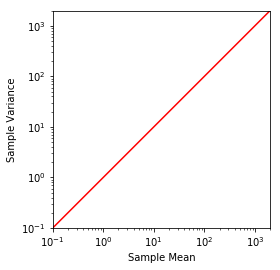

In [24]:
amplitude = 40
base_line = 50
true_r2 = 0.8
n_exps = 1000
n = 1
m = 200
angle = np.arccos(true_r2**0.5)
#create the expected responses
lambdas = base_line + (np.cos(np.linspace(0, 2*np.pi, m))*amplitude) #s
y = np.random.poisson(lambdas, size=(n_exps, n, m)) # n_experiments n_trials m_stimuli
y_mean = y.mean(1) # average the trials
y_var = y.var(1, ddof=0)
plt.scatter(y_mean[0], y_var[0])
ax = plt.gca()
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
plt.axis('square')
plt.xlim([0.1,base_line*amplitude]);plt.ylim([0.1,base_line*amplitude])
plt.plot([0.1,base_line*amplitude],[0.1,base_line*amplitude], color='r')
plt.xlabel('Sample Mean');plt.ylabel('Sample Variance')

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd
slopes = []
for i in range(n_exps):
    df = pd.DataFrame(np.array([np.log(y_mean[i]), np.log(y_var[i])]).T, columns=['mean', 'var'])
    mod = (ols('var ~ mean', data=df).fit())
    slopes.append(mod.params[1])

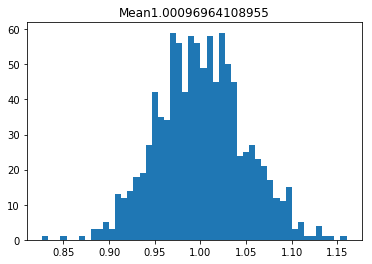

In [23]:
slopes = np.array(slopes)[~np.isinf(slopes)]
plt.hist(slopes, bins=50);
plt.title('Mean=' + str(np.round(np.mean(slopes)))

In [15]:
print(mod.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.180   
Dependent Variable: var              AIC:                304.1519
Date:               2018-06-15 06:26 BIC:                310.7486
No. Observations:   200              Log-Likelihood:     -150.08 
Df Model:           1                F-statistic:        44.78   
Df Residuals:       198              Prob (F-statistic): 2.21e-10
R-squared:          0.184            Scale:              0.26525 
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
Intercept      -0.8813    0.5502  -1.6018  0.1108  -1.9662  0.2037
mean            1.2327    0.1842   6.6917  0.0000   0.8695  1.5960
-----------------------------------------------------------------
Omnibus:              12.989       Durbin-Watson:          2.277 
Prob(Omnibus):        

(array([ 1.,  2.,  5., 15., 24., 38., 50., 38., 15., 12.]),
 array([-1.6107453 , -1.34981117, -1.08887703, -0.82794289, -0.56700875,
        -0.30607462, -0.04514048,  0.21579366,  0.4767278 ,  0.73766194,
         0.99859607]),
 <a list of 10 Patch objects>)

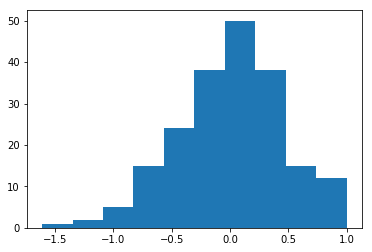

In [12]:
plt.hist(mod.resid)

[ 50  68  87 106 125 144 163 182 201 220 239 258 277 296 315 334 353 372
 391 410 429 448 467 486 505 524 543 562 581 600 619 638 657 676 695 714
 733 752 771 790 809 828 847 866 885 904 923 942 961 980]
[[1.         0.63637664]
 [0.63637664 1.        ]]


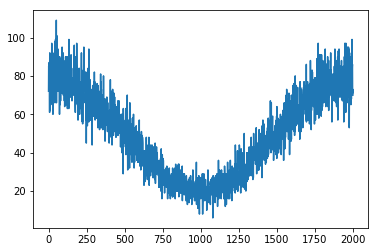

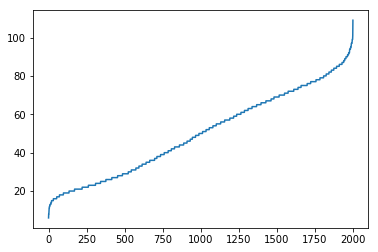

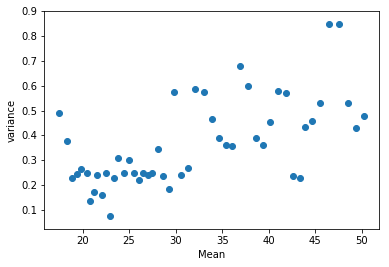

In [59]:
amplitude = 30
base_line = 50
true_r2 = 0.8
n_exps = 1
n = 1
m = 2000
angle = np.arccos(true_r2**0.5)
#create the expected responses
lambdas = base_line + (np.cos(np.linspace(0, 2*np.pi, m))*amplitude) #s
y = np.random.poisson(lambdas, size=(n_exps, n, m)) # n_experiments n_trials m_stimuli
plt.plot(y[0].T)

bin_len=50
bins = np.linspace(50,980,bin_len).astype(int)
print(bins)
ys = np.sort(y[0].ravel())
plt.figure()
plt.plot(ys)
v = [np.var(ys[a_bin:a_bin+bin_len]) for a_bin in bins]
m = [np.mean(ys[a_bin:a_bin+bin_len]) for a_bin in bins]

plt.figure()
plt.scatter(m,v)
plt.xlabel('Mean')
plt.ylabel('variance')
print(np.corrcoef(m,v))
    

Here I want to figure out:
Why should I use the log log transform to the mean and variance: sqaured and linear become orthogonal?
How do my confidence intervals depend upon n, m, dynamic range, and mean. Which should I work the hardest to get?
Why are my residuals not normal?



In [56]:
ys.shape

(2000,)